In [153]:
import pandas as pd
import seaborn as sns
from sklearn import svm 
import numpy as np

### Импортирую данные

In [566]:
test = pd.read_csv('/Users/konstantinpavlov/Downloads/test.csv')
train = pd.read_csv('/Users/konstantinpavlov/Downloads/train.csv')

In [749]:
temp = train.append(test)

In [751]:
df.parch = temp.Parch

In [754]:
df.dtypes

survived     float64
pclass         int64
sex            int64
sibsp       category
parch          int64
fare        category
embarked       int64
dtype: object

### Провожу первичный анализ

In [568]:
df = train.append(test)

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [569]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


### Имена, билет, кабина - шум

In [571]:
df.drop(columns={'Name','Ticket','Cabin'}, inplace=True)

### Решил, что работать с заглавными буквами неудобно. 

In [572]:
df.rename(columns=rename, inplace=True)

In [236]:
def rename(name):
    return name.lower()

In [573]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### ID пассажира - шум

In [574]:
df.drop(columns='passengerid', inplace=True)

In [575]:
df.dtypes

survived    float64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

### Меняю пол на числовое значение: 0 - М, 1 - Ж

In [577]:
df.sex.replace({'male':0, 'female':1}, inplace=True)

In [578]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0.0,3,0,22.0,1,0,7.2500,S
1,1.0,1,1,38.0,1,0,71.2833,C
2,1.0,3,1,26.0,0,0,7.9250,S
3,1.0,1,1,35.0,1,0,53.1000,S
4,0.0,3,0,35.0,0,0,8.0500,S


### Похожая процедура для порта (embarked)

In [579]:
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [580]:
df.embarked.replace({'S':0, 'C':1,'Q':2}, inplace=True)

### Время заполнять пропуски

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    float64
 1   pclass    1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 92.0 KB


### Порт заполним модой

In [582]:
df.embarked.mode()

0    0.0
dtype: float64

In [583]:
df.embarked.fillna(0, inplace=True)

### Меня немного раздражает, что порт у нас float, поэтому сделам int

In [584]:
df.embarked = df.embarked.astype(int)

In [585]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0.0,3,0,22.0,1,0,7.2500,0
1,1.0,1,1,38.0,1,0,71.2833,1
2,1.0,3,1,26.0,0,0,7.9250,0
3,1.0,1,1,35.0,1,0,53.1000,0
4,0.0,3,0,35.0,0,0,8.0500,0


### Заполняем пропуски по возрасту

### Я решил заполнить их как среднее возраста в классе билета

In [586]:
p1 = df.query('pclass == 1').age.mean()

In [587]:
p2 = df.query('pclass == 2').age.mean()

In [588]:
p3 = df.query('pclass == 3').age.mean()

In [694]:
df.loc[(df.age.isna())& (df.pclass == 1), 'age'] = p1

In [696]:
df.loc[(df.age.isna())& (df.pclass == 2), 'age'] = p2

In [698]:
df.loc[(df.age.isna())& (df.pclass == 3), 'age'] = p3

In [699]:
df.isna().sum()

survived    418
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          1
embarked      0
dtype: int64

### Посмотрим корреляции

In [700]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.000000,-0.338481,0.543351,-0.048914,-0.035322,0.081629,0.257307,0.106811
pclass,-0.338481,1.000000,-0.124617,-0.443623,0.060832,0.018322,-0.558629,0.038875
sex,0.543351,-0.124617,1.000000,-0.053271,0.109609,0.213125,0.185523,0.120423
age,-0.048914,-0.443623,-0.053271,1.000000,-0.198886,-0.131205,0.199491,-0.012452
sibsp,-0.035322,0.060832,0.109609,-0.198886,1.000000,0.373587,0.160238,-0.073461
parch,0.081629,0.018322,0.213125,-0.131205,0.373587,1.000000,0.221539,-0.095523
fare,0.257307,-0.558629,0.185523,0.199491,0.160238,0.221539,1.000000,0.061126
embarked,0.106811,0.038875,0.120423,-0.012452,-0.073461,-0.095523,0.061126,1.000000


### Видим выраженную кор-ю по полу

#### Также посмотрим кор-ю по pclass, fare и embarked

In [701]:
df.groupby('pclass').agg({'survived':'mean'})

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


### Корреляция присутствует

### Разделим fare по перцентилям

In [703]:
df.fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: fare, Length: 281, dtype: int64

In [702]:
df.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [705]:
df.fare = pd.qcut(df.fare, 3, labels=[0,1,2])

In [706]:
df.groupby('fare').agg({'survived':'mean'})

,survived
fare,
0,0.198052
1,0.402778
2,0.559322


### Корреляция присутствует

### С возрастом поступим также, только возьмем побольше групп

/Users/konstantinpavlov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

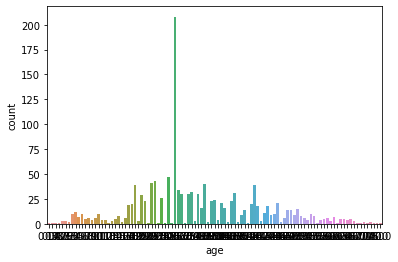

In [710]:
sns.countplot(df.age)

In [724]:
df.age.mode()

0    24.816367
dtype: float64

In [723]:
pd.qcut(df.age, 4).value_counts()

(22.0, 26.0]     348
(0.169, 22.0]    333
(37.0, 80.0]     319
(26.0, 37.0]     309
Name: age, dtype: int64

In [725]:
df.age = pd.qcut(df.age, 4, labels=[0,1,2,3])

In [726]:
df.groupby('age').agg({'survived':'mean'})

,survived
age,
0,0.424242
1,0.294643
2,0.426606
3,0.389908


### Выраженной корреляции нет

In [727]:
df.drop(columns='age', inplace=True)

In [728]:
df.describe()

,survived,pclass,sex,sibsp,parch,embarked
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.355997,0.498854,0.385027,0.394194
std,0.486592,0.837836,0.478997,1.041658,0.865560,0.653499
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,9.000000,2.000000


In [729]:
df.sibsp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [730]:
df.groupby('sibsp').agg({'survived':'mean'})

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Тут сложно говорить о корреляции, тк значений больше 2 слишком мало, попробуем разделить по группам и посмотреть еще раз

In [731]:
df.groupby(pd.cut(df.sibsp, 4)).agg({'survived':'mean'})

,survived
sibsp,
"(-0.008, 2.0]",0.396450
"(2.0, 4.0]",0.205882
"(4.0, 6.0]",0.000000
"(6.0, 8.0]",0.000000


### Особой разницы я не вижу, попробуем тогда разделить есть ли родственники или нет

In [742]:
df.groupby(pd.cut(df.sibsp, [-1, 0, 20], labels=(0,1))).agg({'survived':'mean'})

,survived
sibsp,
0,0.345395
1,0.466431


In [734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    float64 
 1   pclass    1309 non-null   int64   
 2   sex       1309 non-null   int64   
 3   sibsp     1309 non-null   int64   
 4   parch     1309 non-null   int64   
 5   fare      1308 non-null   category
 6   embarked  1309 non-null   int64   
dtypes: category(1), float64(1), int64(5)
memory usage: 105.3 KB


### Так вроде получше

In [743]:
df.sibsp = pd.cut(df.sibsp, [-1, 0, 20], labels=(0,1))

In [765]:
df.groupby('parch').agg({'survived':'mean'})

,survived
parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000
9,NaN


In [772]:
df.parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: parch, dtype: int64

### Тут даже если объединить будет слишком мало данных

In [774]:
df.drop(columns='parch', inplace=True)

### С данными пока все

In [783]:
df.head()

,survived,pclass,sex,sibsp,fare,embarked
0,0.0,3,0,1,0,0
1,1.0,1,1,1,2,1
2,1.0,3,1,0,0,0
3,1.0,1,1,1,2,0
4,0.0,3,0,0,0,0


In [787]:
train_df = df[df.survived.notna()]

In [788]:
test_df = df[df.survived.isna()]

In [792]:
y = train_df['survived'] 
X = train_df.drop(columns=['survived'])

In [799]:
test_y = pd.read_csv('gender_submission.csv')

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

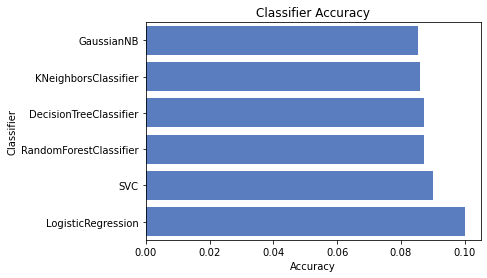

In [804]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, y_train, y_test = train_df.drop(columns='survived'), test_df.drop(columns='survived'), \
    train_df.survived, test_y.Survived
acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

<AxesSubplot:title={'center':'Classifier f1'}, xlabel='f1', ylabel='Classifier'>

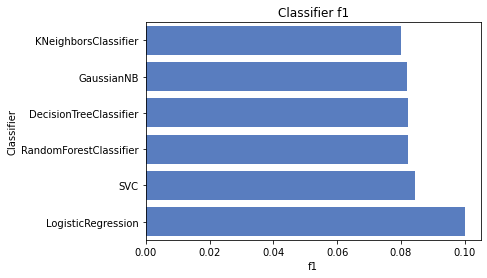

In [805]:
log_cols = ["Classifier", "f1"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, y_train, y_test = train_df.drop(columns='survived'), test_df.drop(columns='survived'), \
    train_df.survived, test_y.Survived
acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = f1_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('f1')
plt.title('Classifier f1')

sns.set_color_codes("muted")
sns.barplot(x='f1', y='Classifier', data=log.sort_values(by='f1'), color="b")